### This Notebook is a playground for different Context T-SCE in a static Causal Hans Setting. 

Note: This is not really tested. Different Context were more part of the CoinRunner Game. 

In [1]:
from dotenv import load_dotenv
load_dotenv()

import os
from IPython.display import Image
from CausalHansDynTSCE import CausalHansDataDynTSCE, CausalHansInterpreterDynTSCE
from DynTSCE.CausalNodeDynamicTSCE import CausalNodeDynamicTSCE
from DynTSCE.tree_helper import generateTreeImage
from Utils.load import load_dataset
from Utils.images import getTimeAsString

In [2]:
IMG_BASE_PATH = os.path.join("tmp_img", "DYNTSCE")
os.makedirs(IMG_BASE_PATH, exist_ok=True)

In [3]:
PATH_TO_DATA = os.path.join("tmp_data", "dyntsce_causalhans.pkl")
dataset = load_dataset(PATH_TO_DATA)
data = CausalHansDataDynTSCE(dataset)

In [4]:
interpreter = CausalHansInterpreterDynTSCE(data)
# Different Method here than used before. Looking for Persons in the specific age range. 
cExamples= interpreter._get_valid_question_ts_and_person("Nutrition", num=350)
print(f"Number of examples: {len(cExamples)}")

Number of examples: 350


2964 9
Using Person 2964 at time 9 as example.
Participant is 25.337552773488802 years old at the moment.



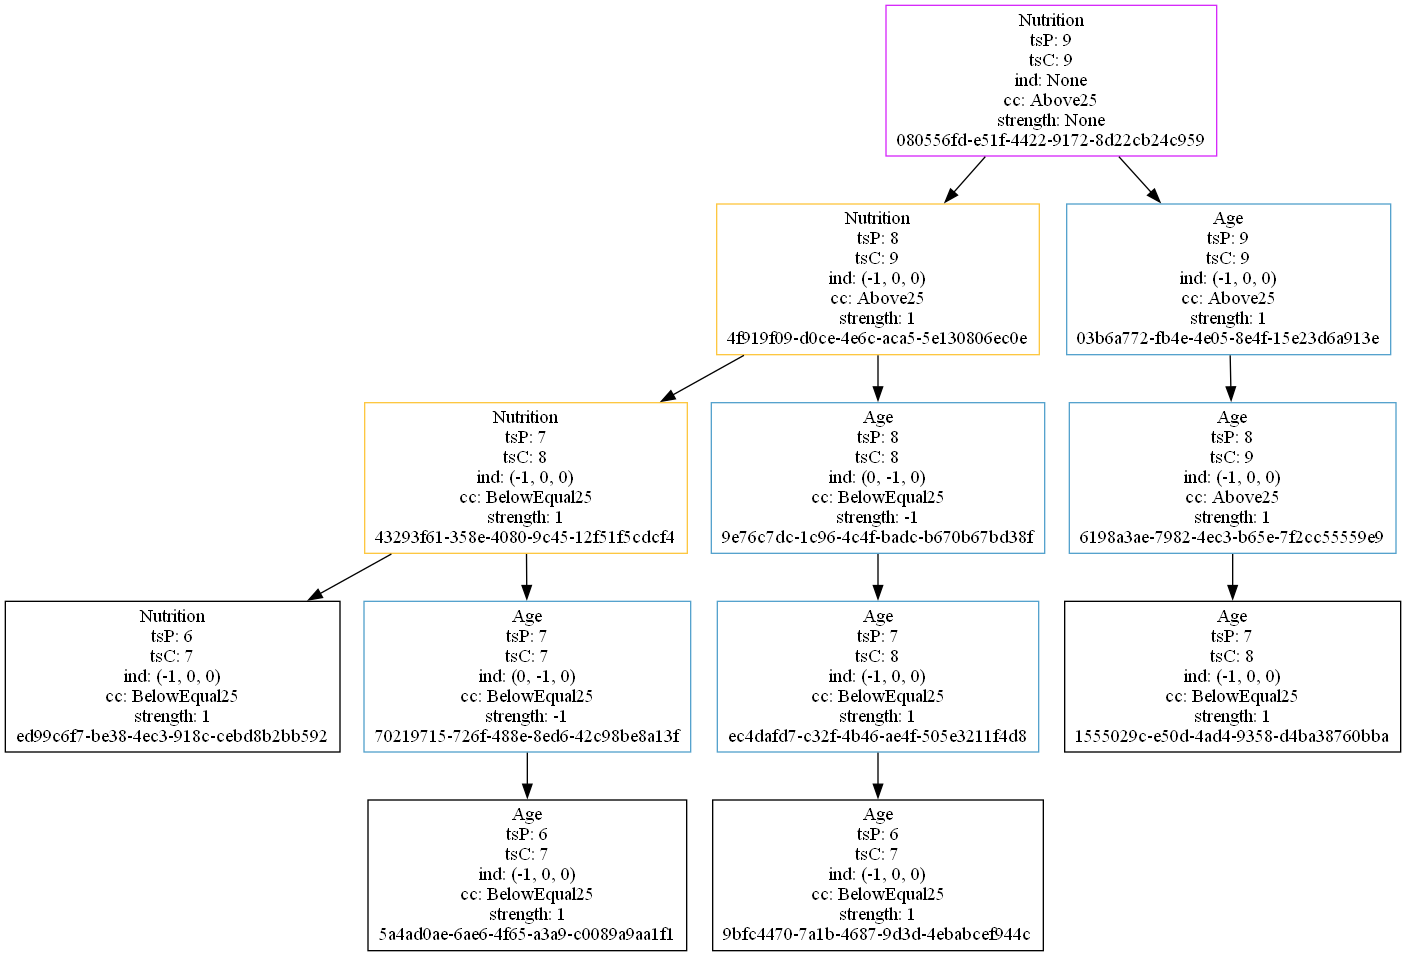

Hans Nutrition was below average this year because of his low Nutrition 1 year before and because of his low Age in the same year.

His Nutrition constantly over the last 2 years starting 1 years ago was below average because of his low Nutrition continously 1 year before and although his low Age in the objected year.

His Age constantly over the last 3 years was below average because of his low Age continously 1 year before.



In [5]:
cPerson ,cTs,  = cExamples[50]

print(cPerson ,cTs)
print(f"Using Person {cPerson} at time {cTs} as example.")
print(f"Participant is {data.get_person_at_ts_variable(cPerson, cTs, 'Age')} years old at the moment.\n")

cExpTree = interpreter.getExpTree(cPerson, cTs, "Nutrition", max_depth=3)

filepath = os.path.join("tmp_img", "DYNTSCE",  f"dyntssce_{getTimeAsString()}.png")
generateTreeImage(cExpTree, filepath=filepath)
display(Image(filename=filepath))

cExplanations = interpreter.getExplanation(cExpTree)

for cExplanation in cExplanations:
    print(cExplanation)
    print() 
